In [1]:
# Imports
import cv2
import os
import random
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Pos shape:  (323, 442)
Neg shape:  (304, 383)


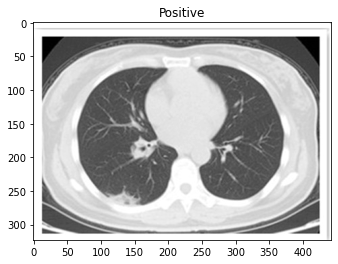

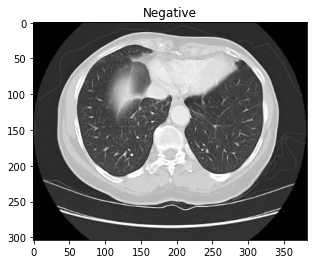

In [2]:
# Get random pos and neg, display
pos_dir = os.path.abspath("../scans/CT_COVID")
pos_img = cv2.cvtColor(img.imread(os.path.join(pos_dir, random.choice(os.listdir(pos_dir)))), cv2.COLOR_BGR2GRAY)
neg_dir = os.path.abspath("../scans/CT_NonCOVID")
neg_img = cv2.cvtColor(img.imread(os.path.join(neg_dir, random.choice(os.listdir(neg_dir)))), cv2.COLOR_BGR2GRAY)
print("Pos shape: ", np.shape(pos_img))
print("Neg shape: ", np.shape(neg_img))
plt.figure()
plt.title("Positive")
plt.imshow(pos_img, cmap = plt.cm.gray)
plt.figure()
plt.title("Negative")
plt.imshow(neg_img, cmap = plt.cm.gray)

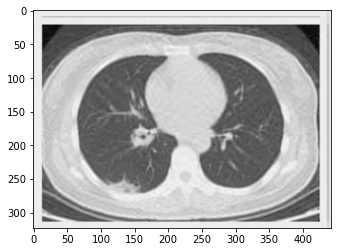

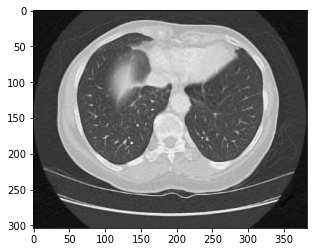

In [3]:
# Running PCA
pca_p = PCA(n_components=0.99)
pos_pca = pca_p.fit_transform(pos_img)
approx = pca_p.inverse_transform(pos_pca)
plt.figure()
plt.imshow(approx, cmap = plt.cm.gray)

pca_n = PCA(n_components=0.99)
neg_pca = pca_n.fit_transform(neg_img)
approx = pca_n.inverse_transform(neg_pca)
plt.figure()
plt.imshow(approx, cmap = plt.cm.gray)


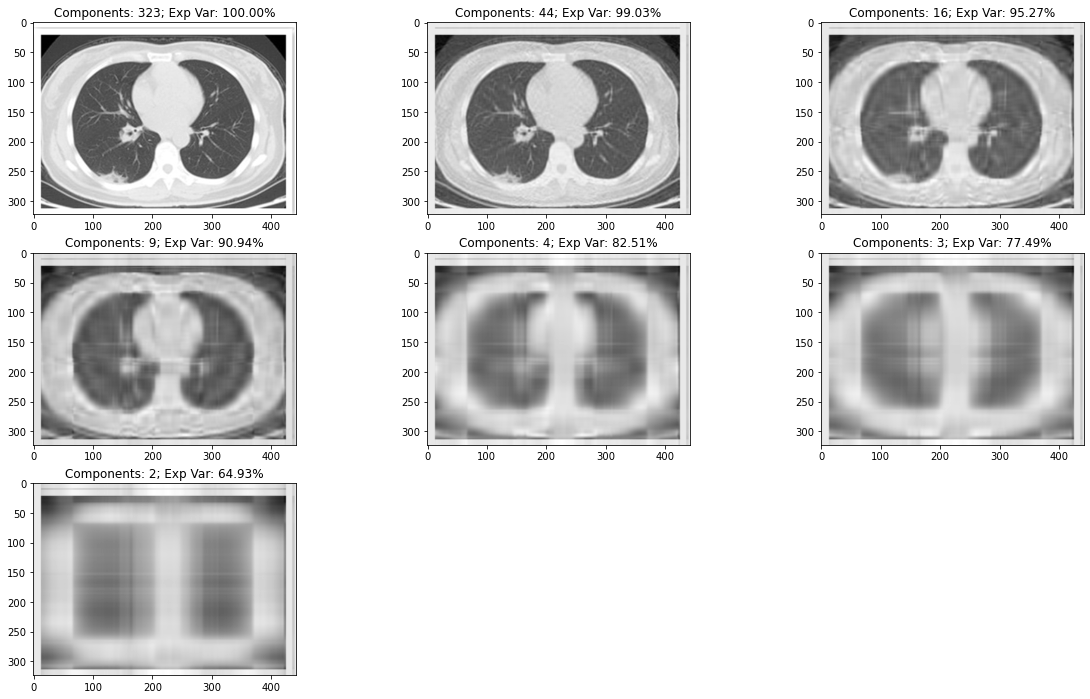

In [4]:
# Analysis - positive img
# What is our component "drop-off" after running PCA with different levels of recovered variance?
pca_100 = PCA()
pca_99 = PCA(n_components=.99)
pca_95 = PCA(n_components=.95)
pca_90 = PCA(n_components=.90)
pca_80 = PCA(n_components=.80)
pca_68 = PCA(n_components=.68)
pca_50 = PCA(n_components=.50)

pca_fits = [pca_100, pca_99, pca_95, pca_90, pca_80, pca_68, pca_50]

comps = []
evar = []
imgs = []

for fit in pca_fits:
    transform = fit.fit_transform(pos_img)
    comps.append(fit.n_components_)
    evar.append(sum(fit.explained_variance_ratio_))
    imgs.append(fit.inverse_transform(transform))
    
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(20)
for i in range(len(imgs)):
    ax = fig.add_subplot(331 + i)
    ax.title.set_text("Components: " + str(comps[i]) + "; Exp Var: " + str("{:.2%}".format(evar[i])))
    ax.imshow(imgs[i], cmap = plt.cm.gray)
plt.show()


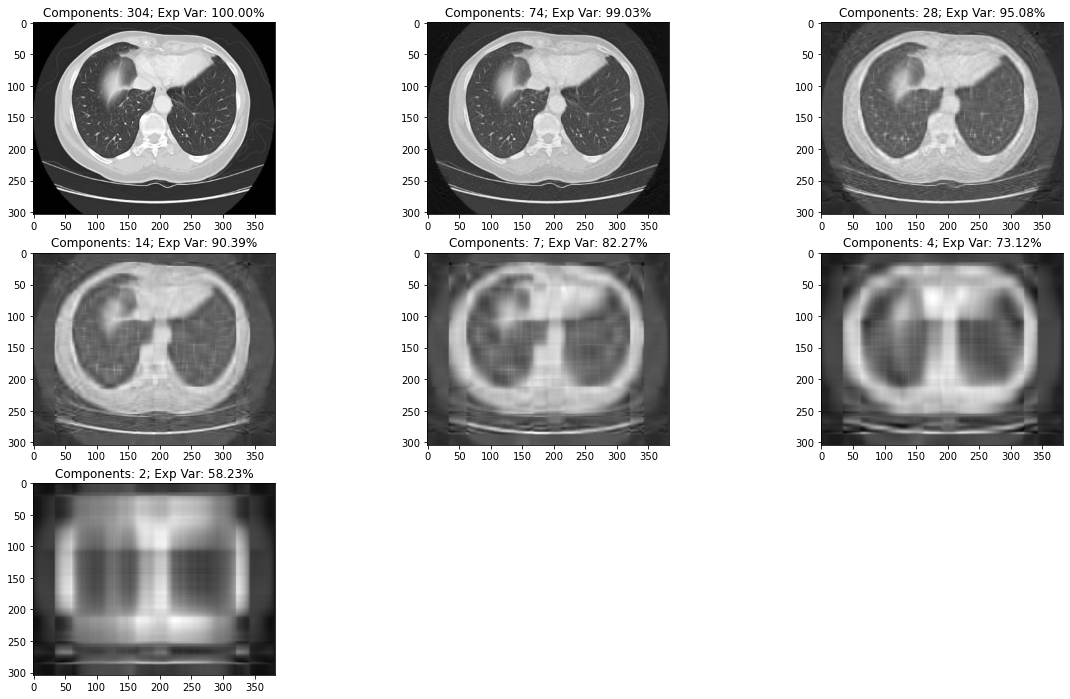

In [5]:
# Analysis - neg img
# What is our component "drop-off" after running PCA with different levels of recovered variance?
pca_100 = PCA()
pca_99 = PCA(n_components=.99)
pca_95 = PCA(n_components=.95)
pca_90 = PCA(n_components=.90)
pca_80 = PCA(n_components=.80)
pca_68 = PCA(n_components=.68)
pca_50 = PCA(n_components=.50)

pca_fits = [pca_100, pca_99, pca_95, pca_90, pca_80, pca_68, pca_50]

comps = []
evar = []
imgs = []

for fit in pca_fits:
    transform = fit.fit_transform(neg_img)
    comps.append(fit.n_components_)
    evar.append(sum(fit.explained_variance_ratio_))
    imgs.append(fit.inverse_transform(transform))
    
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(20)
for i in range(len(imgs)):
    ax = fig.add_subplot(331 + i)
    ax.title.set_text("Components: " + str(comps[i]) + "; Exp Var: " + str("{:.2%}".format(evar[i])))
    ax.imshow(imgs[i], cmap = plt.cm.gray)
plt.show()
